In [1]:
import pandas as pd
import numpy as np
import csv
import urllib.request
import urllib
import geopandas as gpd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import shapely.wkt
import seaborn as sns
sns.set()

%matplotlib inline

# suppress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [3]:
#read the zip code polygon file
zipcode = gpd.read_file('ZIP_CODE_040114.shp')

In [4]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)

In [5]:
zipcode = zipcode.drop_duplicates(subset=["ZIPCODE"], keep='last')
zipcode.shape

(248, 13)

In [6]:
# green = pd.read_csv('zip2.csv')

In [1]:
# green

In [ ]:
#read the socio-economic data
pop_data = pd.read_csv("population_data.csv")

In [ ]:
pop_data.shape

In [ ]:
#normalize the income and home value columns using min-max method
pop_data['2021_Median_Home_Value']=(pop_data['2021_Median_Home_Value']-pop_data['2021_Median_Home_Value'].min())/(pop_data['2021_Median_Home_Value'].max()-pop_data['2021_Median_Home_Value'].min())
pop_data['2021_Income']=(pop_data['2021_Income']-pop_data['2021_Income'].min())/(pop_data['2021_Income'].max()-pop_data['2021_Income'].min())

In [ ]:
#reducing the commute time to work bin into three time frames
pop_data['CTW_<25_Min']= pop_data['CTW_lessthan5_Min'] + pop_data["CTW_5-9_Min"]+pop_data['CTW_10-14_Min'] + pop_data["CTW_15-19_Min"]+pop_data['CTW_20-24_Min']
pop_data['CTW_25-45_Min']= pop_data['CTW_25-29_Min'] + pop_data["CTW_30-34_Min"]+pop_data['CTW_35-39_Min'] + pop_data['CTW_40-44_Min']
pop_data['CTW_>45_Min']= pop_data["CTW_45-59_Min"]+pop_data['CTW_60-89_Min'] + pop_data['CTW_90+_Min']

In [ ]:
# in between this step and the later steps, another notebook provides the code where we ranked the commute time and the safety rank.

In [8]:
#read the combined socio-economic data (ranked)
pop_data = pd.read_csv("ML_final_nokey.csv")

In [9]:
pop_data

,ZIPCODE,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...,...
172,11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
173,11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
174,11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
175,11694,0.075225,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556


In [11]:
# pop_data = pop_data.loc[~(pop_data['2021_Income'] == 0)]

In [12]:
pop_data

,ZIPCODE,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...,...
172,11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
173,11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
174,11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333
175,11694,0.075225,0.909,0.0230,0.48,0.25,0.393605,0.459603,0.494444,0.905556


In [18]:
pop_green = pop_data.set_index('ZIPCODE')

In [19]:
pop_green

,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
ZIPCODE,,,,,,,,,
10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333
...,...,...,...,...,...,...,...,...,...
11691,0.188066,0.869,0.0278,0.40,0.17,0.303052,0.250994,0.700000,0.472222
11692,0.150778,0.816,0.0295,0.38,0.17,0.255352,0.242189,0.083333,0.483333
11693,0.068311,0.901,0.0222,0.40,0.17,0.235193,0.340733,0.077778,0.408333


In [20]:
# find silhouette score for kmeans clustering
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: 
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels_ = km.fit_predict(pop_green)
    #finding average Silhouette scores for each clustersb
    silhouette_avg_ = silhouette_score(pop_green, cluster_labels_)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg_))

For n_clusters =2, the average silhouette_score is :0.39570419539215124
For n_clusters =3, the average silhouette_score is :0.33564673998775607
For n_clusters =4, the average silhouette_score is :0.32170792151802896
For n_clusters =5, the average silhouette_score is :0.28833560450094115
For n_clusters =6, the average silhouette_score is :0.29523690493481164
For n_clusters =7, the average silhouette_score is :0.2753466107092328
For n_clusters =8, the average silhouette_score is :0.2858228972663476
For n_clusters =9, the average silhouette_score is :0.27513764484319553


In [21]:
#fit k-mean cluster to the socio-economic data
cluster_km = KMeans(n_clusters = 4, random_state = 324).fit(pop_green)
cluster_km.labels_ = cluster_km.predict(pop_green) #get labels

In [22]:
max(cluster_km.labels_)

3

In [23]:
#create dataframe of the cluster label and zipcode
pop_label=pd.DataFrame({'ZIPCODE':pop_green.index, 'label':cluster_km.labels_ })
pop_label.head()

,ZIPCODE,label
0,10001,1
1,10002,0
2,10003,1
3,10004,1
4,10005,1


In [24]:
pop_label['label'] = pop_label['label'].astype(str)

In [25]:
#combine the cluster label data with the socio-economic dataframe
pop_green_cluster = zipcode.merge(pop_label,left_on = 'ZIPCODE', right_on = 'ZIPCODE', how = 'inner')

In [26]:
pop_green_cluster

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,label
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",2
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",1
173,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",3
174,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",3
175,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",2


<AxesSubplot:>

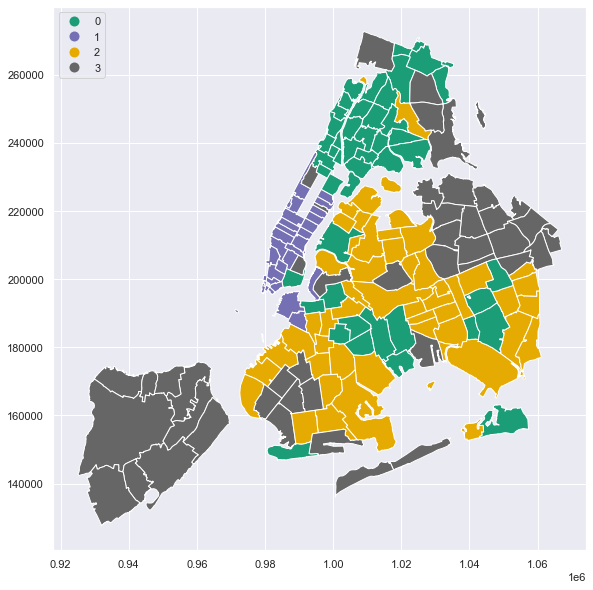

In [27]:
#visualize the clusters
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
pop_green_cluster.plot(column='label',cmap='Dark2', 
                                    legend=True,ax=ax, legend_kwds={'loc': 'upper left'})

In [28]:
pop_char = pop_green.reset_index()
pop_char.head()

,ZIPCODE,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333


In [29]:
pop_char = pop_char.merge(pop_label,on='ZIPCODE')
pop_char.head()

,ZIPCODE,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,label
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,1
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,0
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,1
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,1
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,1


In [30]:
pop_char_grp = pop_char.groupby('label').mean()

In [31]:
pop_char_grp = pop_char_grp.iloc[:,1:]
# pop_char_grp.pop(-2)
pop_char_grp

,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
label,,,,,,,,,
0,0.134159,0.850413,0.018546,0.342391,0.170435,0.308853,0.227224,0.412440,0.291848
1,0.076192,0.940844,0.017247,0.422187,0.406875,0.723222,0.708481,0.840104,0.196615
2,0.065627,0.891673,0.015192,0.447308,0.227500,0.360196,0.379143,0.206517,0.624786
3,0.141845,0.911021,0.016045,0.520426,0.235106,0.369290,0.407814,0.688534,0.812411


In [32]:
pop_char_grp.rename(columns={'Green_%age':'Green Percentage'}, inplace=True)
pop_char_grp.rename(columns={'2021_Employment_Rate':'Employment Rate'}, inplace=True)
pop_char_grp.rename(columns={'2019_Pop_3+_in_Nursery/Presch':'Age 3+ Nursery Enrolled'}, inplace=True)
pop_char_grp.rename(columns={'pop15_marital_status':'Marital Status'}, inplace=True)
pop_char_grp.rename(columns={'pop25_att_Bachelors':'Age 25+ Bachelors Degree'}, inplace=True)
pop_char_grp.rename(columns={'2021_Median_Home_Value':'Median House Price'}, inplace=True)
pop_char_grp.rename(columns={'2021_Income':'Median Income'}, inplace=True)
pop_char_grp.rename(columns={'commute_rank':'Commute time to Work'}, inplace=True)
pop_char_grp.rename(columns={'safety_rank':'Safety'}, inplace=True)

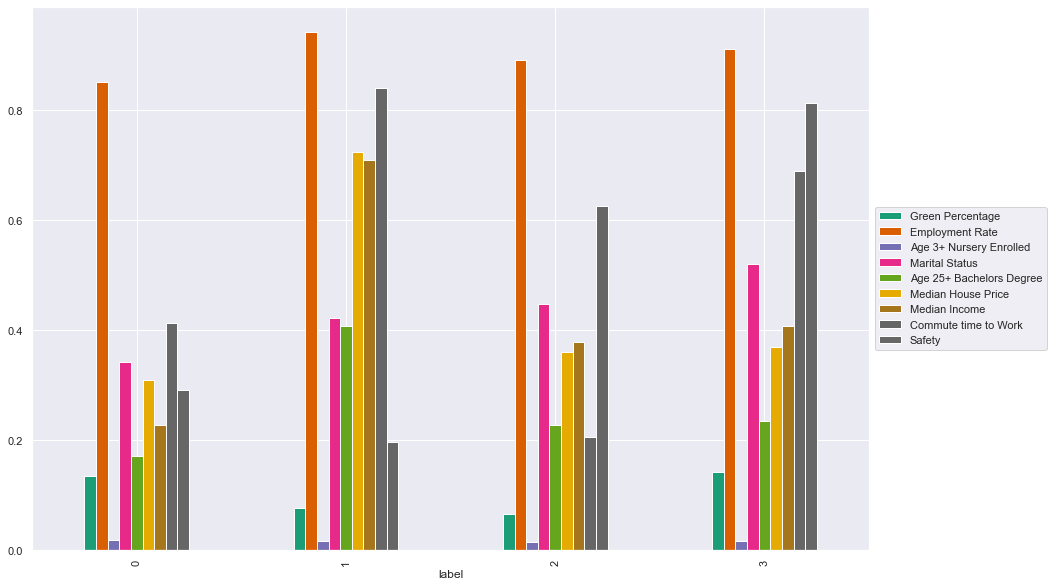

In [33]:
#bar plot of the underlying characteristics of each clusters
pop_char_grp.plot.bar(figsize = (15,10),cmap = 'Dark2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [34]:
#finding silhouette score for Gaussian Mixture 
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: 
    gmm = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels_ = gmm.fit_predict(pop_green)
    #finding average Silhouette scores for each clusters
    silhouette_avg_ = silhouette_score(pop_green, cluster_labels_)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg_))

For n_clusters =2, the average silhouette_score is :0.36577531158222887
For n_clusters =3, the average silhouette_score is :0.3014688505115934
For n_clusters =4, the average silhouette_score is :0.24023258697264124
For n_clusters =5, the average silhouette_score is :0.2552744172071251
For n_clusters =6, the average silhouette_score is :0.23241426803213897
For n_clusters =7, the average silhouette_score is :0.21284193500952978
For n_clusters =8, the average silhouette_score is :0.19084539081267332
For n_clusters =9, the average silhouette_score is :0.1705839720606437


In [35]:
#fit gaussian mixture model
cluster_gmm = GaussianMixture(n_components = 4, random_state = 324).fit(pop_green)
cluster_gmm.labels_ = cluster_gmm.predict(pop_green) #get labels

In [36]:
#create dataframe of the cluster label and zipcode
pop_label=pd.DataFrame({'ZIPCODE':pop_green.index, 'label':cluster_gmm.labels_ })
pop_label.head()

,ZIPCODE,label
0,10001,1
1,10002,3
2,10003,1
3,10004,1
4,10005,1


In [37]:
pop_label['label'] = pop_label['label'].astype(str)

In [38]:
pop_green_cluster2 = zipcode.merge(pop_label,left_on = 'ZIPCODE', right_on = 'ZIPCODE', how = 'inner')

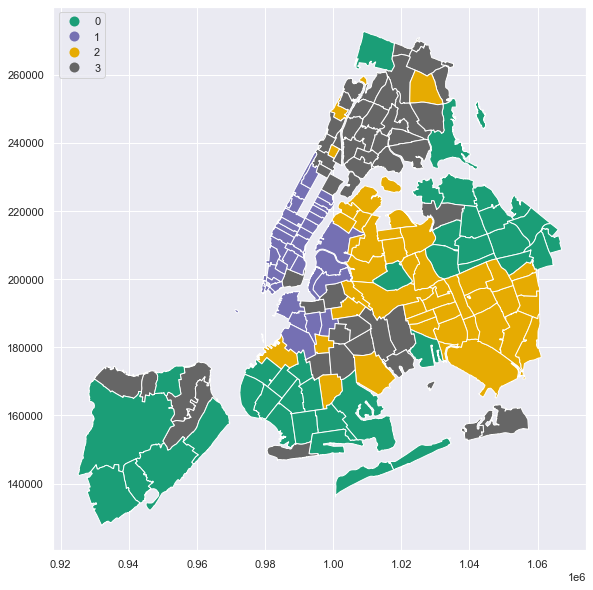

In [39]:
#visualize the clusters
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
pop_green_cluster2.plot(column='label',cmap='Dark2', 
                                    legend=True,ax=ax, legend_kwds={'loc': 'upper left'}, )
plt.savefig("WO_Tweet_GMM.png", transparent = True)

In [40]:
pop_char = pop_green.reset_index()
pop_char.head()

,ZIPCODE,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333


In [41]:
pop_char = pop_char.merge(pop_label,on='ZIPCODE')
pop_char.head()

,ZIPCODE,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank,label
0,10001,0.011399,0.917,0.0074,0.32,0.42,0.472468,0.521412,0.927778,0.044444,1
1,10002,0.177066,0.884,0.0104,0.39,0.24,0.416539,0.189844,0.822222,0.355556,3
2,10003,0.039076,0.929,0.0079,0.28,0.44,0.676661,0.605687,0.955556,0.188889,1
3,10004,0.074975,0.960,0.0182,0.40,0.48,0.681547,0.880601,0.916667,0.022222,1
4,10005,0.002952,0.962,0.0118,0.33,0.52,0.804327,0.847911,0.972222,0.033333,1


In [42]:
pop_char_grp = pop_char.groupby('label').mean()

In [43]:
pop_char_grp = pop_char_grp.iloc[:,1:]
pop_char_grp

,Green_%age,2021_Employment_Rate,2019_Pop_3+_in_Nursery/Presch,pop15_marital_status,pop25_att_Bachelors,2021_Median_Home_Value,2021_Income,commute_rank,safety_rank
label,,,,,,,,,
0,0.154385,0.908732,0.016656,0.545610,0.231220,0.370676,0.410621,0.631843,0.870393
1,0.078846,0.935415,0.017193,0.416829,0.393659,0.697749,0.662569,0.750678,0.257046
2,0.054293,0.883889,0.014036,0.438000,0.213778,0.328583,0.370627,0.241728,0.603580
3,0.133662,0.860520,0.018594,0.356200,0.170000,0.296909,0.226547,0.427889,0.340056


In [44]:
pop_char_grp.rename(columns={'Green_%age':'Green Percentage'}, inplace=True)
pop_char_grp.rename(columns={'2021_Employment_Rate':'Employment Rate'}, inplace=True)
pop_char_grp.rename(columns={'2019_Pop_3+_in_Nursery/Presch':'Age 3+ Nursery Enrolled'}, inplace=True)
pop_char_grp.rename(columns={'pop15_marital_status':'Marital Status'}, inplace=True)
pop_char_grp.rename(columns={'pop25_att_Bachelors':'Age 25+ Bachelors Degree'}, inplace=True)
pop_char_grp.rename(columns={'2021_Median_Home_Value':'Median House Price'}, inplace=True)
pop_char_grp.rename(columns={'2021_Income':'Median Income'}, inplace=True)
pop_char_grp.rename(columns={'commute_rank':'Commute time to Work'}, inplace=True)
pop_char_grp.rename(columns={'safety_rank':'Safety'}, inplace=True)

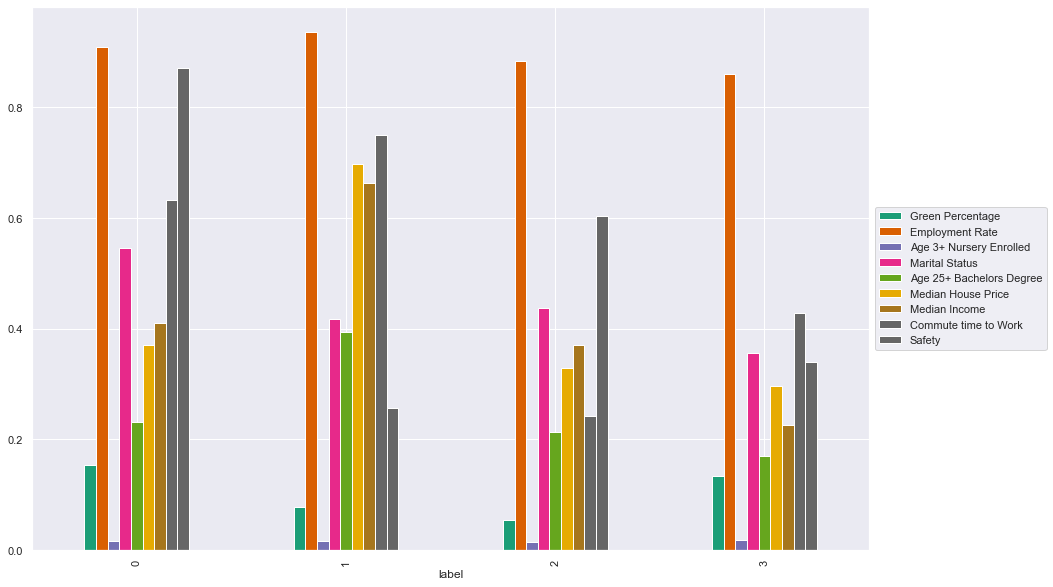

In [48]:
#bar plot of underlying characteristics of each cluster
pop_char_grp.plot.bar(figsize = (15,10),cmap = 'Dark2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("WO_Tweet_GMM_bar.png", transparent = True)